In [1]:
import TubeClass
import numpy as np
from scipy.integrate import solve_ivp,solve_bvp
from scipy.optimize import fsolve
import matplotlib.pyplot as plt
import sympy as sym
from sympy.solvers import ode
import math

In [4]:
def Euler_init():
  global l,m,P,Jx,E,delta,l1,n,alpha
  Jx = np.pi * 0.5**4 / 64 * (1 - 0.49**4 / 0.5**4) #1 / 2 * m / l * (0.5**2 + 0.49**2)**2 #момент инерции
  E = 2.06 * 10**11 #модуль Юнга
  n = 5

  #P = n*np.pi*E*Jx/l**2 #сила сжатия трубы
  P = 1.5e6

  delta = 0.1

  l1 = np.pi/(np.sqrt(P/(E*Jx)))
  l = np.sqrt(n*np.pi**2*E*Jx/P) #длина трубы
  #l1 = l/np.sqrt(n)
  alpha = np.sqrt(P/(E*Jx))
  print(np.pi/alpha)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


17.96729718600746
1500000.0
0.09999999999999999


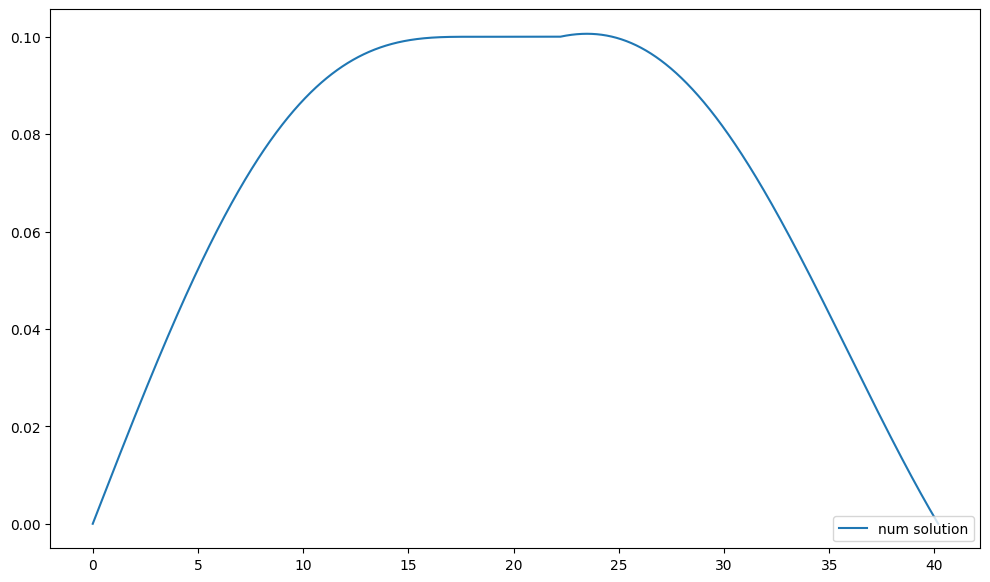

17.96729718600746


In [5]:
Euler_init()
print(P)

def Euler_fun1(x,w):
  return np.vstack((w[1],-delta*np.pi/l1**2*np.sin(alpha*x)))
def Euler_fun3(x,w):
  return  np.vstack((w[1],delta*np.pi/l1**2*np.sin(alpha*x)))

# Краевые условия
def bc_E0(ya, yb): # шарниры
  return np.array([ya[0], yb[0]-delta])
def bc_E1(ya, yb): # шарниры
  return np.array([ya[0]-delta, yb[0]])

totalNodes = 1000
x1 = np.linspace(0, l1, totalNodes)
y1 = np.array(delta/np.pi*(np.sin(alpha*x1)+alpha*x1))
x2 = np.linspace(l1, l-l1, totalNodes)
y2 = np.array(y1[-1]*(1-x2+x2))
x3 = np.linspace(l-l1, l, totalNodes)
y3 = np.array(np.floor(np.sqrt(n))*delta-delta/np.pi*(np.sin(alpha*x3)+alpha*x3))
#y3 = np.array(delta/np.pi*(-np.sin(alpha*x3)+np.pi*np.cos(alpha*x3)+alpha*x3))
#y3 = np.array(delta/np.pi*((np.cos(alpha*l)-np.pi*np.sin(alpha*l))*np.sin(alpha*x3)
#                           -(np.sin(alpha*l)+np.pi*np.cos(alpha*l))*np.pi*np.cos(alpha*x3)+alpha*x3))
x = np.hstack([x1,x2,x3])
y = np.hstack([y1,y2,y3])

tx1 = np.linspace(0, l, totalNodes)
ty1 = np.array(delta/np.pi*(np.sin(alpha*tx1)+alpha*tx1))

tx = np.linspace(0,l,totalNodes)
ty = np.array(delta*np.sin(alpha*tx))
print(y1[-1])
plt.figure(figsize=(12,7))
#plt.plot(x,y,label='accurate solution')
plt.legend(loc='lower right')

#plt.plot(tx1,ty1,label='accurate+ solution')
#plt.plot(tx,ty,label='Common accurate solution')
plt.legend(loc='lower right')

w1 = np.zeros((2, x1.shape[0]))
w3 = np.zeros((2, x3.shape[0]))
solbc1 = solve_bvp(Euler_fun1,bc_E0,x1,w1, tol = 1e-10, max_nodes=totalNodes)
solbc3 = solve_bvp(Euler_fun3,bc_E1,x3,w3, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc1.y[0]
w2 = w1[-1]*np.ones(x2.shape[0])
w3 = solbc3.y[0]
w = np.hstack([w1,w2,w3])
#x = np.hstack([x1,x3])
#w = np.hstack([w1,w3])
plt.plot(x,w,label='num solution')
plt.legend(loc='lower right')
plt.show()
print(l1)


# Вариант Овчинникова

17.96729718600746
1500000.0


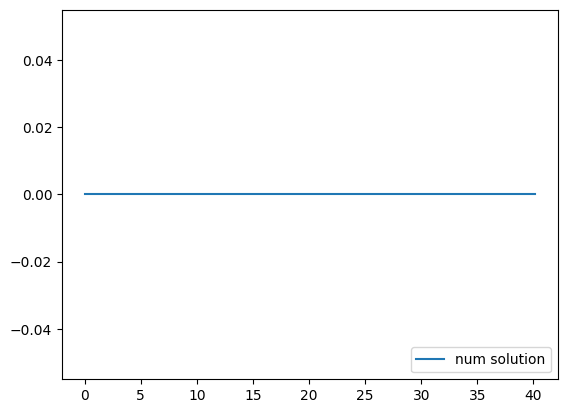

       message: The algorithm converged to the desired accuracy.
       success: True
        status: 0
             x: [ 0.000e+00  4.022e-02 ...  4.014e+01  4.018e+01]
           sol: <scipy.interpolate._interpolate.PPoly object at 0x000002BBCEC6BF70>
             p: None
             y: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
            yp: [[ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
                 [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]]
 rms_residuals: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]
         niter: 1

In [6]:
Euler_init()
print(P)
def Euler_fun(x,w):
  return np.vstack((w[1],w[2],w[3],P/(E*Jx)*w[2]))
# Краевые условия
def bc_E(ya, yb): # шарниры
  return np.array([ya[0], yb[0],ya[1],yb[1]])

totalNodes = 1000
x = np.linspace(0, l, totalNodes)

w = np.zeros((4, x1.shape[0]))
solbc = solve_bvp(Euler_fun,bc_E,x,w, tol = 1e-10, max_nodes=totalNodes)
w1 = solbc.y[0]
plt.plot(x,w1,label='num solution')
plt.legend(loc='lower right')
plt.show()
solbc

# Урманчеевский вариант

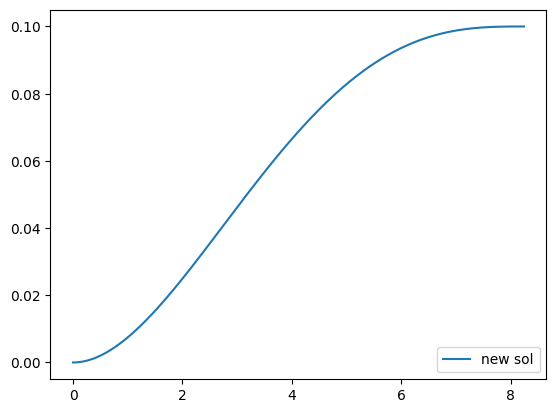

In [7]:
rhol = 7800
g = 9.81
l = np.power(72*(E*Jx)*delta/(rhol*g),1/4)
totalNodes = 10000
x1 = np.linspace(0, l, totalNodes)
y1 = np.array(rhol*g/(E*Jx)*(x1**4/24-l/9*x1**3+l**2/12*x1**2))
plt.plot(x1,y1,label='new sol')
plt.legend(loc='lower right')
plt.show()

# Target method class

In [8]:
class TargetMethod:
    def __init__(self,l=20,):
        

SyntaxError: incomplete input (3742113943.py, line 3)

In [6]:
F = lambda t, s: np.dot(np.array([[0,1],[0,-9.8/s[1]]]),s)

t_span = np.linspace(0, 5, 100)
y0 = 0
#v0 = 40
t_eval = np.linspace(0, 5, 10)

def objective(v0):
    sol = solve_ivp(F, [0, 5], [y0, v0], t_eval = t_eval)
    y = sol.y[0]
    return y[-1] - 50
print(fsolve(objective,10))
v0= fsolve(objective, 10)
print(v0)
sol = solve_ivp(F, [0, 5], \
                [y0, v0], t_eval = t_eval)

plt.figure(figsize = (10, 8))
plt.plot(sol.t, sol.y[0])
plt.plot(5, 50, 'ro')
plt.xlabel('time (s)')
plt.ylabel('altitude (m)')
plt.title(f'first guess v={v0} m/s')
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

Решение краевой задачи: [ 76.16113432  84.22688461  91.25382495  97.15536492 101.85866639
 105.30575148 107.45410492 108.27723151 107.7649758  105.92365818]


<function matplotlib.pyplot.show(close=None, block=None)>

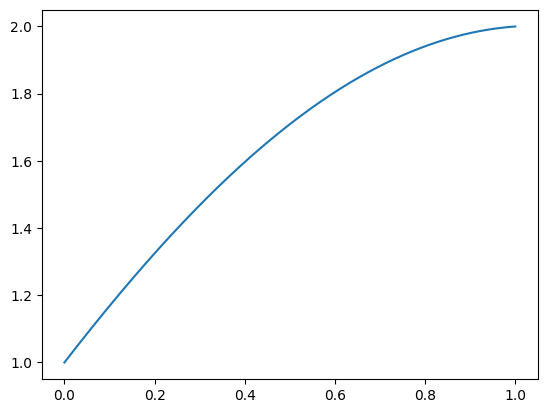

In [15]:
def fun(x,y):
  return  np.vstack((y[1],-y[0]))
# Краевые условия
def bc(ya, yb): # шарниры
  return np.array([ya[0]-1, yb[0]-2])
x = np.linspace(0,1,totalNodes)
y = np.zeros((2,x.shape[0]))
solbc = solve_bvp(fun,bc,x,y, tol = 1e-10, max_nodes=totalNodes)
ans = solbc.y[0]
plt.plot(x,ans)
plt.show